# Generate Binary Images

In [3]:
import cv2
import json
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import os.path as ops
from collections import Iterable

from PIL import Image

C:\Users\NICOLAY\OneDrive - The University of Texas at Austin\AA_MSBA_Texas_McCombs\01_Courses\02_Fall\02_Advanced_Machine_Learning\05_Homeworks\Lane_Detection\venv\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  


In [21]:
# Time
from datetime import datetime, timezone
from time import time
import pytz
CST = pytz.timezone('US/Central')

### Functions

In [6]:
def read_labels(label_path):
    labels = json.load(open(label_path, 'r'))
    if not isinstance(labels, Iterable):
        labels = [labels]
    return labels

In [8]:
def get_lanes(objects):
    return [o for o in objects
            if 'poly2d' in o and o['category'][:4] == 'lane']

In [9]:
def draw_lane_line(dst, frame):
    objects = frame['labels']
    objects = get_lanes(objects)

    for obj in objects:
        for poly in obj['poly2d']:
            points = [v for v in poly['vertices']]
            lane_pts = np.array([points], np.int64)
            cv2.polylines(dst, lane_pts, isClosed=False, color=255, thickness=5)

    return dst

## Training set

In [17]:
image_dir = 'ComputerVision/workspace/images/train/'
label_paths = 'ComputerVision/workspace/labels/bdd100k_labels_images_train.json'

save_image_path = 'ComputerVision/workspace/images/100k/train/gt_image_jpg/'
save_binary_path = 'ComputerVision/workspace/images/100k/train/gt_binary_image_jpg/'

### Generate Binary Image

In [18]:
# Labels
label = read_labels(label_paths)

In [19]:
# List of images with Lanes and Drivable: Training set
n = len(label) # Number of images
lst_img_train = []

for i in range(n):
  data_tmp = label[i]
  k = len(data_tmp['labels'])
  lane = 0
  drivable = 0
  for j in range(k):
    if data_tmp['labels'][j]['category'] == 'lane':
      lane += 1
    if data_tmp['labels'][j]['category'] == 'drivable area':
      drivable += 1

  # Source image path
  src_path = os.path.join(image_dir, data_tmp['name'])

  if lane > 0 and drivable > 0 and os.path.exists(src_path):
    lst_img_train.append(data_tmp['name'])

lst_img_train = sorted(lst_img_train)
print('\033[1mTraining set\033[0m')
len(lst_img_train)

Training set


64123

### Binary Images

In [28]:
start_number = 0
i = 1

t0 = time()
for k in range(len(label)):
  if label[k]['name'] in lst_img_train:
      frame = label[k]
      image_path = image_dir + frame['name']
      img = mpimg.imread(image_path)
      img_lane = np.array(img, dtype=np.uint8)
      
      # img + lane
      img_lane = draw_lane_line(img_lane, frame)
      
      # binary lane imnage
      dst_binary_image = np.zeros([img.shape[0], img.shape[1]], np.uint8)
      dst_binary_image = draw_lane_line(dst_binary_image, frame)

      # save binary
      save_name = '{:05d}.jpg'.format(i+start_number)
      save_path = save_binary_path + save_name
      cv2.imwrite(save_path, dst_binary_image)

      # save image
      save_name = '{:05d}.jpg'.format(i+start_number)
      save_path = save_image_path + save_name
      cv2.imwrite(save_path, img[:, :, (2, 1, 0)])

      if (i%1000) == 0:
        print('Step: {:>5} - {} - Time: {:.2f}'.format(i,datetime.now(CST).strftime("%H:%M:%S"),time()-t0))
        t0 = time()
      i += 1
print(i-1)

Step:  1000 - 23:16:08 - Time: 55.84
Step:  2000 - 23:17:06 - Time: 58.25
Step:  3000 - 23:17:59 - Time: 52.84
Step:  4000 - 23:18:53 - Time: 54.18
Step:  5000 - 23:19:46 - Time: 53.04
Step:  6000 - 23:20:46 - Time: 59.53
Step:  7000 - 23:21:42 - Time: 56.53
Step:  8000 - 23:22:37 - Time: 54.86
Step:  9000 - 23:23:37 - Time: 59.59
Step: 10000 - 23:24:34 - Time: 56.93
Step: 11000 - 23:25:37 - Time: 63.59
Step: 12000 - 23:26:40 - Time: 62.13
Step: 13000 - 23:27:39 - Time: 59.14
Step: 14000 - 23:28:37 - Time: 58.13
Step: 15000 - 23:29:36 - Time: 58.95
Step: 16000 - 23:30:37 - Time: 61.49
Step: 17000 - 23:31:40 - Time: 63.21
Step: 18000 - 23:32:42 - Time: 61.23
Step: 19000 - 23:33:48 - Time: 66.21
Step: 20000 - 23:34:59 - Time: 71.46
Step: 21000 - 23:36:04 - Time: 64.35
Step: 22000 - 23:37:06 - Time: 62.46
Step: 23000 - 23:38:04 - Time: 57.96
Step: 24000 - 23:39:01 - Time: 56.88
Step: 25000 - 23:39:58 - Time: 56.75
Step: 26000 - 23:40:55 - Time: 56.97
Step: 27000 - 23:41:52 - Time: 57.08
S

In [31]:
# Checking
lst_dir_img = os.listdir(save_image_path)
lst_dir_bin = os.listdir(save_binary_path)
print('N° images:', len(lst_dir_img))
print('N° binary:', len(lst_dir_bin))

N° images: 64123
N° binary: 64123


## Validation set

In [32]:
image_dir = 'ComputerVision/workspace/images/val/'
label_paths = 'ComputerVision/workspace/labels/bdd100k_labels_images_val.json'

save_image_path = 'ComputerVision/workspace/images/100k/val/gt_image_jpg/'
save_binary_path = 'ComputerVision/workspace/images/100k/val/gt_binary_image_jpg/'

### Generate Binary Image

In [33]:
# Labels
label = read_labels(label_paths)

In [34]:
# List of images with Lanes and Drivable: Validation set
n = len(label) # Number of images
lst_img_val = []

for i in range(n):
  data_tmp = label[i]
  k = len(data_tmp['labels'])
  lane = 0
  drivable = 0
  for j in range(k):
    if data_tmp['labels'][j]['category'] == 'lane':
      lane += 1
    if data_tmp['labels'][j]['category'] == 'drivable area':
      drivable += 1

  # Source image path
  src_path = os.path.join(image_dir, data_tmp['name'])

  if lane > 0 and drivable > 0 and os.path.exists(src_path):
    lst_img_val.append(data_tmp['name'])

lst_img_val = sorted(lst_img_val)
print('\033[1mValidation set\033[0m')
len(lst_img_val)

Validation set


9175

### Binary Images

In [35]:
start_number = 0
i = 1

t0 = time()
for k in range(len(label)):
  if label[k]['name'] in lst_img_val:
      frame = label[k]
      image_path = image_dir + frame['name']
      img = mpimg.imread(image_path)
      img_lane = np.array(img, dtype=np.uint8)
      
      # img + lane
      img_lane = draw_lane_line(img_lane, frame)
      
      # binary lane imnage
      dst_binary_image = np.zeros([img.shape[0], img.shape[1]], np.uint8)
      dst_binary_image = draw_lane_line(dst_binary_image, frame)

      # save binary
      save_name = '{:05d}.jpg'.format(i+start_number)
      save_path = save_binary_path + save_name
      cv2.imwrite(save_path, dst_binary_image)

      # save image
      save_name = '{:05d}.jpg'.format(i+start_number)
      save_path = save_image_path + save_name
      cv2.imwrite(save_path, img[:, :, (2, 1, 0)])

      if (i%1000) == 0:
        print('Step: {:>5} - {} - Time: {:.2f}'.format(i,datetime.now(CST).strftime("%H:%M:%S"),time()-t0))
        t0 = time()
      i += 1
print(i-1)

Step:  1000 - 00:31:20 - Time: 82.29
Step:  2000 - 00:32:30 - Time: 70.60
Step:  3000 - 00:33:41 - Time: 70.63
Step:  4000 - 00:34:52 - Time: 70.73
Step:  5000 - 00:36:05 - Time: 72.82
Step:  6000 - 00:37:23 - Time: 77.94
Step:  7000 - 00:38:36 - Time: 73.34
Step:  8000 - 00:39:49 - Time: 73.21
Step:  9000 - 00:41:03 - Time: 73.56
9175


In [36]:
# Checking
lst_dir_img = os.listdir(save_image_path)
lst_dir_bin = os.listdir(save_binary_path)
print('N° images:', len(lst_dir_img))
print('N° binary:', len(lst_dir_bin))

N° images: 9175
N° binary: 9175


## Check

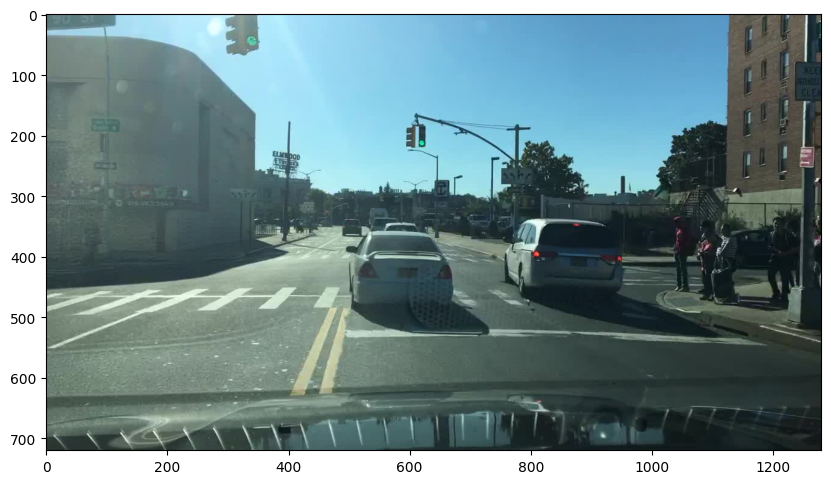

In [37]:
fig = plt.figure(figsize=(10,10))
plt.plot()
plt.imshow(img)

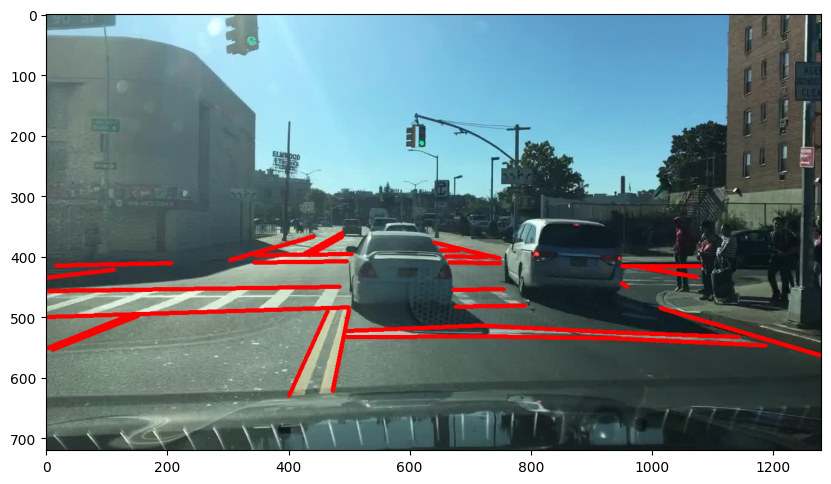

In [38]:
fig = plt.figure(figsize=(10,10))
plt.plot()
plt.imshow(img_lane)

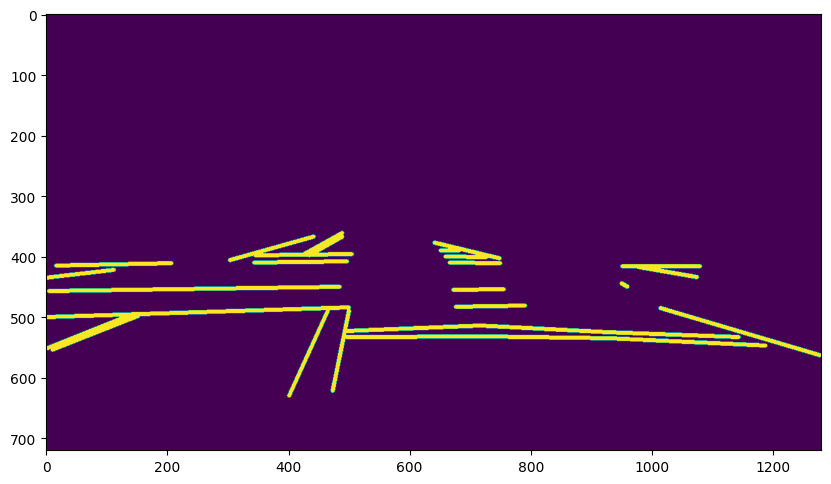

In [39]:
fig = plt.figure(figsize=(10,10))
plt.plot()
plt.imshow(dst_binary_image)